<div style="text-align: center;">
    <h1>PROJECT P8
    <h1><b>Patient Preferences Studies Categorization System</b></h1>
    <h3>Applied Data Science Project</h3>
    <h5>Francesco Giuseppe Gillio</h5>
    <h5>César Augusto Seminario Yrigoyen</h5>
</div>

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/it/4/47/Logo_PoliTo_dal_2021_blu.png" width="250">
</div>

https://github.com/adsp-polito/2024-P8-PPS

# **set-up**

In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
main = '/content/drive/MyDrive/optimal-embedding-model-search'
if not os.path.exists(main):
    os.makedirs(main)

In [4]:
branch = os.path.join('/content/drive/MyDrive/optimal-embedding-model-search', 'charts')
if not os.path.exists(branch):
    os.makedirs(branch)

In [5]:
import warnings
warnings.filterwarnings('ignore')

# **data-collection**

In [6]:
import requests

In [7]:
import pandas as pd

**Downloads** from **GitHub**
* **URL**: https://api.github.com/repos/adsp-polito/2024-P8-PPS/contents/PPS-BC/bert-base-embeddings/tests

In [8]:
github = 'https://api.github.com/repos/adsp-polito/2024-P8-PPS/contents/PPS-BC/bert-base-embeddings/tests'

In [9]:
path = '/content/data'
os.makedirs(path, exist_ok=True)

In [10]:
# download function
def download(github, path):
    response = requests.get(github)
    if response.status_code == 200:
        res = response.json()
        files = [file for file in res if file['name'].endswith('.csv')]

        for file in files:
            csv = requests.get(file['download_url'])
            if csv.status_code == 200:
                with open(
                    os.path.join(
                        path, file['name']), 'w', encoding='utf-8') as f:
                    f.write(csv.text)
            else:
                print(f"Download Error for {file['name']}")
    else:
        print(f"GitHub Folder Access Error. Status Code:{response.status_code}")

In [11]:
download(github, path)

files = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.csv')]
data = [pd.read_csv(file) for file in files]

print(f"From GitHub:")

for frame, file in zip(data, files):
    print(f"{os.path.basename(file)}")

From GitHub:
cross-validation-7-splits-articles-2023.csv
train-validation-test-60-20-20-articles-2023.csv
cross-validation-5-splits-articles-2023.csv
cross-validation-3-splits-articles-2023.csv
train-test-80-20-articles-2023.csv


# **optimal-embedding-model-search**

1. **Model Ranks by Metrics Across Folds**

In [12]:
def rank(data, files, metrics):
    rankings = {}  # dictionary to store rankings for each fold
    for frame, file in zip(data, files):
        # sort the DataFrame by metrics in descending order
        frame = frame.sort_values(
            by=metrics,
            ascending=False)
        rankings[f"{os.path.basename(file)}"] = frame["Model"].tolist()
    return rankings

# rank the models by metrics
ranks = rank(data,
             files,
             metrics=['Macro F1', 'Macro Recall', 'Macro Precision'])

In [13]:
pd.DataFrame(ranks).head(5)

,cross-validation-7-splits-articles-2023.csv,train-validation-test-60-20-20-articles-2023.csv,cross-validation-5-splits-articles-2023.csv,cross-validation-3-splits-articles-2023.csv,train-test-80-20-articles-2023.csv
0,pubmedbert-base-embeddings-text-concatenation,all-distilroberta-v1-vector-concatenation,pubmedbert-base-embeddings-vector-concatenation,pubmedbert-base-embeddings-text-concatenation,pubmedbert-base-embeddings-vector-weighted-ave...
1,all-mpnet-base-v2-text-concatenation,all-distilroberta-v1-vector-sum,pubmedbert-base-embeddings-text-concatenation,all-mpnet-base-v2-text-concatenation,pubmedbert-base-embeddings-vector-sum
2,S-PubMedBert-MS-MARCO-vector-concatenation,all-distilroberta-v1-vector-average,S-PubMedBert-MS-MARCO-vector-concatenation,S-PubMedBert-MS-MARCO-vector-concatenation,pubmedbert-base-embeddings-vector-average
3,all-mpnet-base-v2-vector-concatenation,all-mpnet-base-v2-vector-weighted-average,S-PubMedBert-MS-MARCO-vector-weighted-average,pubmedbert-base-embeddings-vector-concatenation,all-distilroberta-v1-vector-concatenation
4,pubmedbert-base-embeddings-vector-weighted-ave...,pubmedbert-base-embeddings-text-concatenation,S-PubMedBert-MS-MARCO-vector-sum,pubmedbert-base-embeddings-vector-sum,pubmedbert-base-embeddings-text-concatenation


In [14]:
pd.DataFrame(ranks).to_csv('/content/drive/MyDrive/optimal-embedding-model-search/model-ranks-macro-metrics-articles-2023.csv', index=True)

2. **Averages of Macro Metrics for Each Model**

In [15]:
# concatenate DataFrames to compute average and standard deviation for each metric
metrics = pd.DataFrame()

for frame in data:
    metrics = pd.concat([metrics, frame], ignore_index=True)

# compute average for each model and each metric (Macro F1, Macro Recall, Macro Precision)
averages = metrics.groupby('Model')[
    ['Macro F1', 'Macro Recall', 'Macro Precision']
    ].mean()

# sort the averages in descending order by metrics
averages = averages.sort_values(
    by=['Macro F1', 'Macro Recall', 'Macro Precision'],
    ascending=[False, False, False])

In [16]:
averages.head(5)

,Macro F1,Macro Recall,Macro Precision
Model,,,
pubmedbert-base-embeddings-text-concatenation,0.94466,0.95238,0.93810
S-PubMedBert-MS-MARCO-vector-concatenation,0.94140,0.94222,0.94120
pubmedbert-base-embeddings-vector-weighted-average,0.94020,0.94348,0.93828
all-mpnet-base-v2-text-concatenation,0.93902,0.94498,0.93438
pubmedbert-base-embeddings-vector-average,0.93896,0.94404,0.93598


In [17]:
averages.to_csv('/content/drive/MyDrive/optimal-embedding-model-search/model-averages-macro-metrics-articles-2023.csv', index=True)

3. **Standard Deviation of Macro Metrics for Each Model**

In [18]:
# compute the standard deviation for each metric (Macro F1, Macro Recall, Macro Precision)
deviations = metrics.groupby('Model')[
    ['Macro F1', 'Macro Recall', 'Macro Precision']
    ].std()

# sort the deviations in descending order by metrics
deviations = deviations.sort_values(
    by=['Macro F1', 'Macro Recall', 'Macro Precision'],
    ascending=[True, True, True])

In [19]:
deviations.head(10)

,Macro F1,Macro Recall,Macro Precision
Model,,,
bigbird-roberta-large-raw-text-concatenation,0.002743,0.004854,0.006644
all-MiniLM-L6-v2-text-concatenation,0.004668,0.006435,0.012948
all-MiniLM-L6-v2-vector-concatenation,0.006540,0.013869,0.002548
S-PubMedBert-MS-MARCO-text-concatenation,0.007413,0.009862,0.010695
all-mpnet-base-v2-vector-concatenation,0.008077,0.016920,0.005743
pubmedbert-base-embeddings-vector-concatenation,0.008579,0.024697,0.006628
S-PubMedBert-MS-MARCO-vector-average,0.009832,0.021064,0.007943
S-PubMedBert-MS-MARCO-vector-sum,0.009832,0.021064,0.007943
pubmedbert-base-embeddings-text-concatenation,0.010036,0.017200,0.008101


In [20]:
averages.to_csv('/content/drive/MyDrive/optimal-embedding-model-search/model-deviations-macro-metrics-articles-2023.csv', index=True)

4. **Model Positions Heatmap**

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

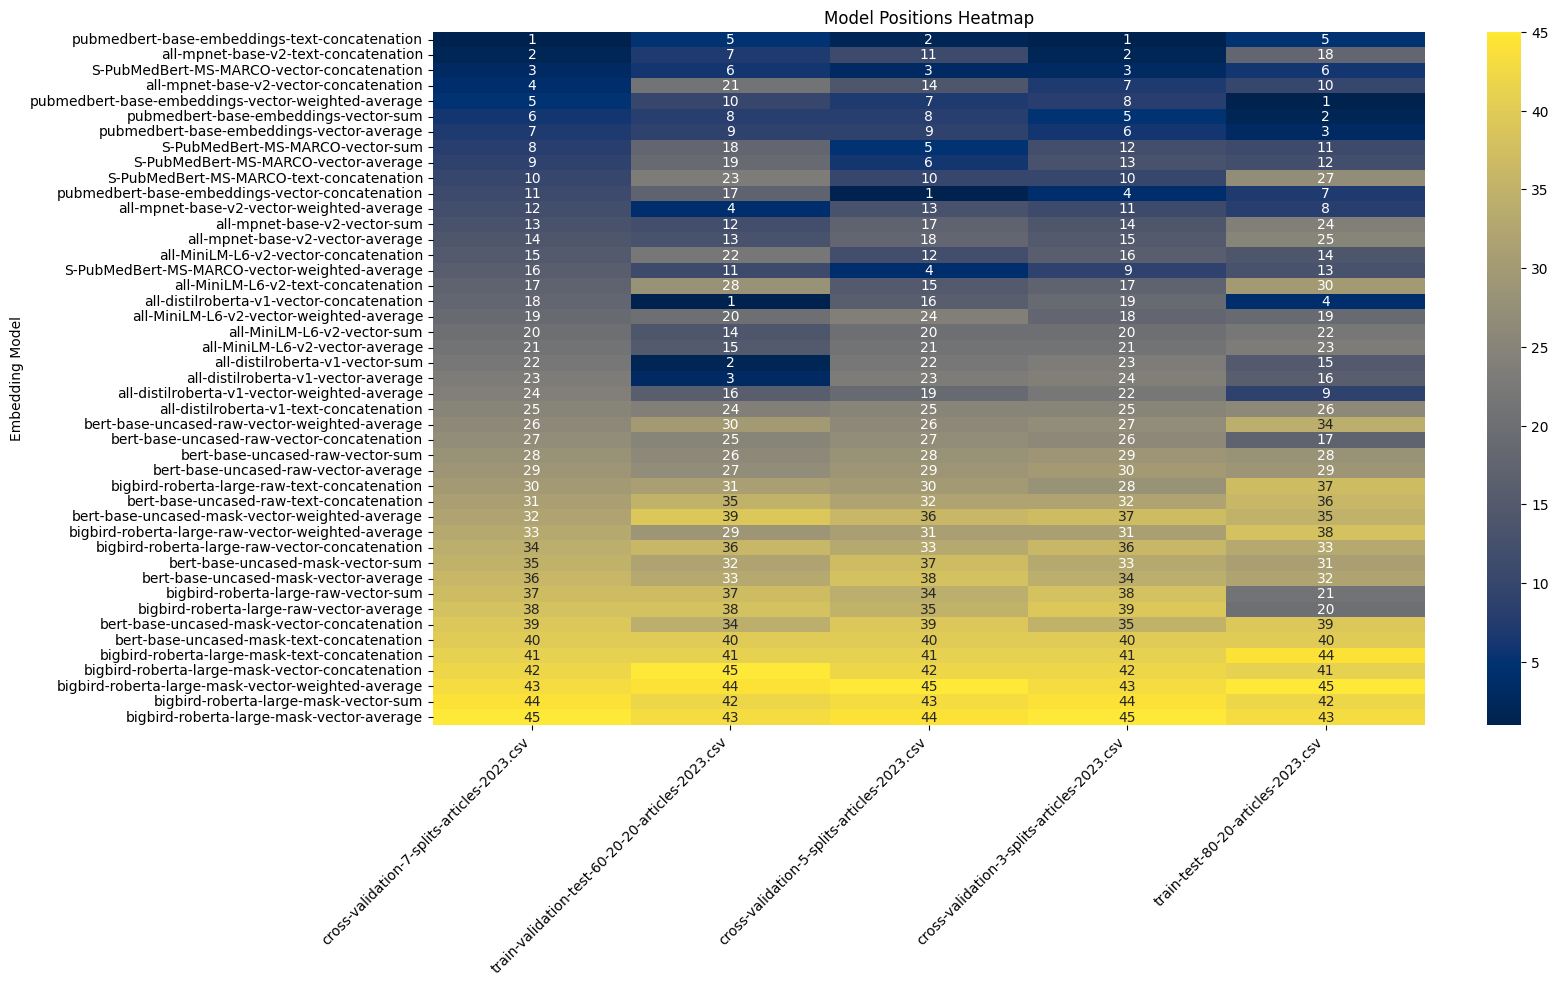

In [22]:
# dictionary to store model positions by ranks
positions = {}

# store the positions of each model by ranks (for each fold)
for column in ranks:
    for position, model in enumerate(ranks[column], start=1):
        if model not in positions:
            positions[model] = {}
        positions[model][column] = position

# DataFrame to store the model ranks across different folds
dataframe = pd.DataFrame(positions).T
dataframe.index.name = "Model"

# plot a heatmap of the ranks to visualize the positions of models
plt.figure(figsize=(16, 9))
sns.heatmap(
    dataframe,
    annot=True,
    cmap="cividis",
    cbar=True,
    fmt=".0f"
)
plt.title("Model Positions Heatmap")
plt.xlabel("")
plt.ylabel("Embedding Model")
plt.xticks(rotation=45, ha='right')

plt.savefig('/content/drive/MyDrive/optimal-embedding-model-search/charts/model-ranks-heatmap-articles-2023.csv.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

5. **Evaluation with Scores and Aggregate Ranks**

In [23]:
# copy the average metrics into a DataFrame for evaluation
evaluation = averages.copy()
# add the standard deviation of Macro F1 to the evaluation DataFrame
evaluation['F1 Standard Deviation'] = deviations['Macro F1']

# compute the score by Macro F1 and standard deviation
evaluation['F1 Score'] = evaluation['Macro F1'] / (1 + evaluation['F1 Standard Deviation'])
evaluation = evaluation.sort_values(
    by=['F1 Score', 'F1 Standard Deviation'],
    ascending=[False, True]
)

# retrieve the optimal model by score
model = evaluation.index[0]
print(f"\nOptimal Model: {model}")
print("\nEvaluation Metrics:")
evaluation.head(5)


Optimal Model: pubmedbert-base-embeddings-text-concatenation

Evaluation Metrics:


,Macro F1,Macro Recall,Macro Precision,F1 Standard Deviation,F1 Score
Model,,,,,
pubmedbert-base-embeddings-text-concatenation,0.94466,0.95238,0.93810,0.010036,0.935273
S-PubMedBert-MS-MARCO-vector-concatenation,0.94140,0.94222,0.94120,0.011673,0.930537
pubmedbert-base-embeddings-vector-concatenation,0.93824,0.94334,0.93500,0.008579,0.930259
pubmedbert-base-embeddings-vector-weighted-average,0.94020,0.94348,0.93828,0.014182,0.927053
pubmedbert-base-embeddings-vector-average,0.93896,0.94404,0.93598,0.013165,0.926760


In [24]:
# compute the statistics (mean and standard deviation) for each metric
evaluation = averages.copy()  # mean of the metrics for each model
evaluation['F1 Standard Deviation'] = deviations['Macro F1']  # standard deviation for Macro F1
evaluation['Recall Standard Deviation'] = deviations['Macro Recall']  # standard deviation for Macro Recall
evaluation['Precision Standard Deviation'] = deviations['Macro Precision']  # standard deviation for Macro Precision

# compute scores for each metric (balance performance with variability)
evaluation['F1 Score'] = evaluation['Macro F1'] / (1 + evaluation['F1 Standard Deviation'])
evaluation['Recall Score'] = evaluation['Macro Recall'] / (1 + evaluation['Recall Standard Deviation'])
evaluation['Precision Score'] = evaluation['Macro Precision'] / (1 + evaluation['Precision Standard Deviation'])

# aggregate score: weighted sum of scores
weights = {
    'F1 Score': 0.5,
    'Recall Score': 0.25,
    'Precision Score': 0.25
}  # weights

evaluation['Score'] = (
    weights['F1 Score'] * evaluation['F1 Score'] +
    weights['Recall Score'] * evaluation['Recall Score'] +
    weights['Precision Score'] * evaluation['Precision Score']
) / sum(weights.values())  # normalize by the sum of weights

# sort the models by score in descending order
evaluation = evaluation.sort_values(
    by='Score',
    ascending=False
)

# retrieve the optimal model by aggregate score
model = evaluation.index[0]
print(f"\nOptimal Model: {model}")
print("\nEvaluation Metrics:")
evaluation.head(5)


Optimal Model: pubmedbert-base-embeddings-text-concatenation

Evaluation Metrics:


,Macro F1,Macro Recall,Macro Precision,F1 Standard Deviation,Recall Standard Deviation,Precision Standard Deviation,F1 Score,Recall Score,Precision Score,Score
Model,,,,,,,,,,
pubmedbert-base-embeddings-text-concatenation,0.94466,0.95238,0.93810,0.010036,0.017200,0.008101,0.935273,0.936276,0.930562,0.934346
S-PubMedBert-MS-MARCO-vector-concatenation,0.94140,0.94222,0.94120,0.011673,0.018543,0.008061,0.930537,0.925067,0.933674,0.929954
pubmedbert-base-embeddings-vector-concatenation,0.93824,0.94334,0.93500,0.008579,0.024697,0.006628,0.930259,0.920604,0.928844,0.927492
pubmedbert-base-embeddings-vector-weighted-average,0.94020,0.94348,0.93828,0.014182,0.025763,0.003982,0.927053,0.919784,0.934559,0.927112
pubmedbert-base-embeddings-vector-average,0.93896,0.94404,0.93598,0.013165,0.028751,0.001553,0.926760,0.917656,0.934529,0.926426


In [25]:
averages.to_csv('/content/drive/MyDrive/optimal-embedding-model-search/model-scores-articles-2023.csv', index=True)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

unito = "#EE1A39"
polito = "#002A5C"

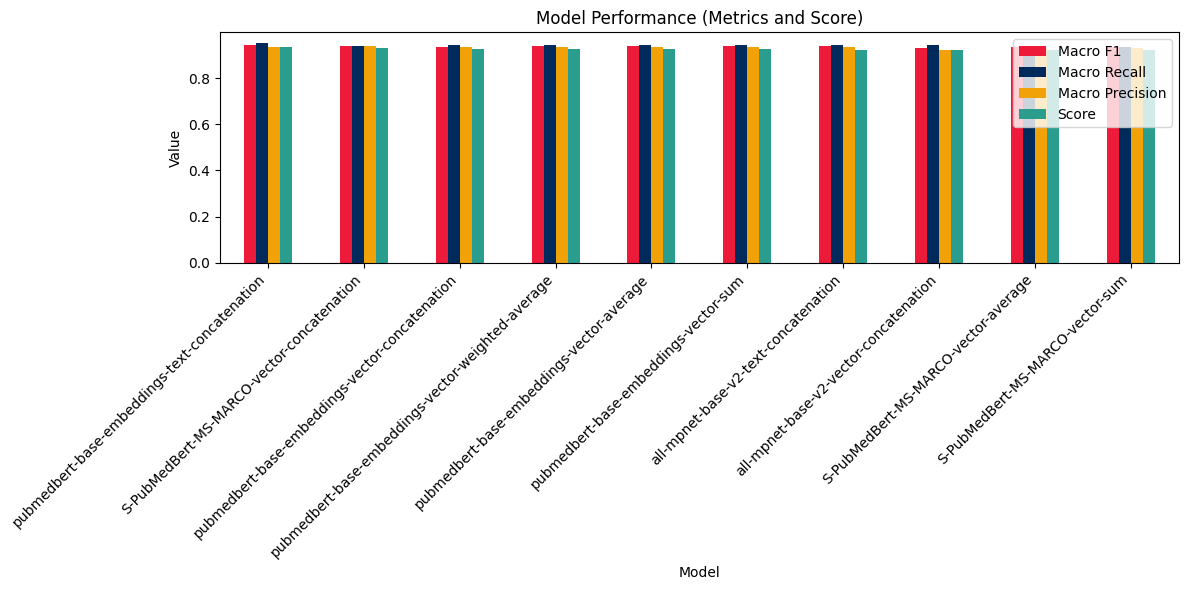

In [27]:
# retrieve top 10 models by score
top = evaluation.head(10)

colors = [unito, polito, "#F1A208", "#2A9D8F"]
map = [colors[i % len(colors)] for i in range(len(top.columns) - 1)]

ax = top[["Macro F1", "Macro Recall", "Macro Precision", "Score"]].plot.bar(
    figsize=(12, 6),
    color=map
)

plt.title("Model Performance (Metrics and Score)")
plt.ylabel("Value")
plt.xticks(
    rotation=45,
    ha='right'
)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/optimal-embedding-model-search/charts/top-models-barchart-articles-2023.csv.png',
            dpi=300,
            bbox_inches='tight')
plt.show()